## Multi-Class Classification on MNIST (Original Dataset)

### Import Required Libraries

In [42]:
import os
import io
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

### Loading MNIST (Original) Dataset

In [43]:
train_df = pd.read_csv('./MNIST Dataset/mnist_train.csv')
test_df = pd.read_csv('./MNIST Dataset/mnist_test.csv')

#### Train CSV - 60000 rows x 785 columns (label + 28 x 28 pixels info)
#### Test CSV - 10000 rows x 785 columns (label + 28 x 28 pixels info)

In [44]:
# Merging train and test MNIST CSV dataset
train_dataset = pd.concat([train_df, test_df], axis = 0, ignore_index = True)
train_dataset.tail(2)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
69998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Preprocessing

In [45]:
y = train_dataset['label']
X = train_dataset.drop('label', axis = 1)

### Dataset Visualization

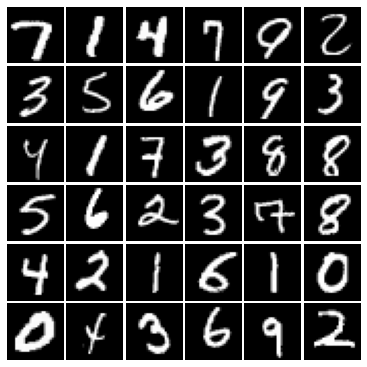

In [46]:
plt.figure(figsize = (5, 5))
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99, wspace=0.05, hspace=0.05)
for i in range(36):
    plt.subplot(6, 6, i + 1)
    rand_index = random.randint(0, len(X))
    rand_img = X.iloc[rand_index].to_numpy().reshape(28, 28)
    plt.imshow(rand_img, cmap = 'gray')
    plt.axis('off')
plt.show()    

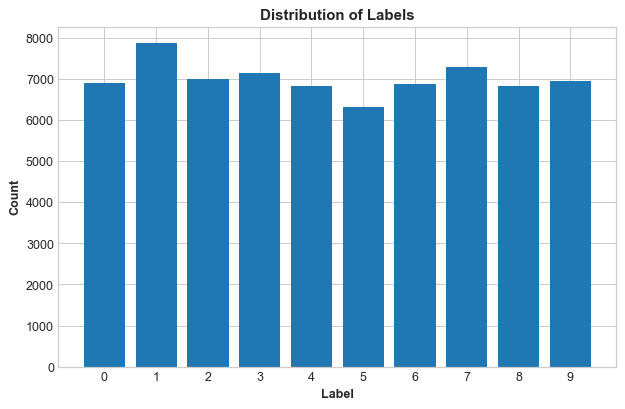

In [47]:
# Count the occurences of each category in the 'label' Column
label_counts = train_dataset['label'].value_counts()

# Get unique labels (class) and their count values
labels = label_counts.index
counts = label_counts.values

# Some Plotting Skills
plt.figure(figsize = (8, 5), dpi = 90)
plt.style.use('seaborn-whitegrid')
plt.bar(labels, counts)
plt.xticks(labels)
plt.xlabel('Label', fontdict = {'size':10, 'weight':'bold'})
plt.ylabel('Count', fontdict = {'size':10, 'weight':'bold'})
plt.title('Distribution of Labels', fontdict = {'size':12, 'weight':'bold'})
plt.show()

### Split 'train_dataset' into 'train' and 'test' dataset

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 69)

In [49]:
print("'X_train' Size(rows): ", len(X_train))
print("'y_train' Size(rows): ", len(y_train))
print("'X_test' Size(rows): ", len(X_test))
print("'y_test' Size(rows): ", len(y_test))

'X_train' Size(rows):  56000
'y_train' Size(rows):  56000
'X_test' Size(rows):  14000
'y_test' Size(rows):  14000


## Classification Models

### Logistic Regression

#### Feature Scaling

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#### Training Logistic Regression

In [51]:
# setting a specific value for 'random_state' ensues that the logistic regression model's random initialization and shuffling of data points remains the same across different runs
# 'max_iter' determines the maximum number of iterations (epochs) that the model will perform to optimize the model's parameter
lr_classifier = LogisticRegression(random_state = 69, max_iter = 800)
lr_classifier.fit(X_train_scaled, y_train)

C:\Users\parzi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=800, random_state=69)

In [52]:
y_pred = lr_classifier.predict(X_test)

C:\Users\parzi\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [53]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8332142857142857


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1670
           1       0.97      0.87      0.92      1995
           2       0.95      0.78      0.86      1760
           3       0.87      0.87      0.87      1748
           4       0.89      0.90      0.89      1706
           5       0.97      0.24      0.38      1571
           6       0.90      0.93      0.92      1745
           7       0.97      0.83      0.89      1836
           8       0.52      0.96      0.67      1730
           9       0.78      0.91      0.84      1739

    accuracy                           0.83     17500
   macro avg       0.87      0.82      0.82     17500
weighted avg       0.87      0.83      0.82     17500



In [27]:
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Extract relevant data from the classification report
data = []

for key, value in classification_rep.items():
    if key not in ['accuracy', 'macro avg', 'weighted avg']:
        row = [key] + [value[label] for label in value.keys()]
        data.append(row)
# Create DataFrame from the extracted data
columns = ['class', 'precision', 'recall', 'f1-score', 'support']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df

,class,precision,recall,f1-score,support
0,0,0.881043,0.971257,0.923953,1670
1,1,0.973655,0.870677,0.919291,1995
2,2,0.953310,0.777273,0.856338,1760
3,3,0.868119,0.866133,0.867125,1748
4,4,0.887471,0.896835,0.892128,1706
5,5,0.971354,0.237428,0.381586,1571
6,6,0.901721,0.930659,0.915962,1745
7,7,0.971172,0.825708,0.892552,1836
8,8,0.519062,0.960116,0.673834,1730
9,9,0.784304,0.913744,0.844090,1739


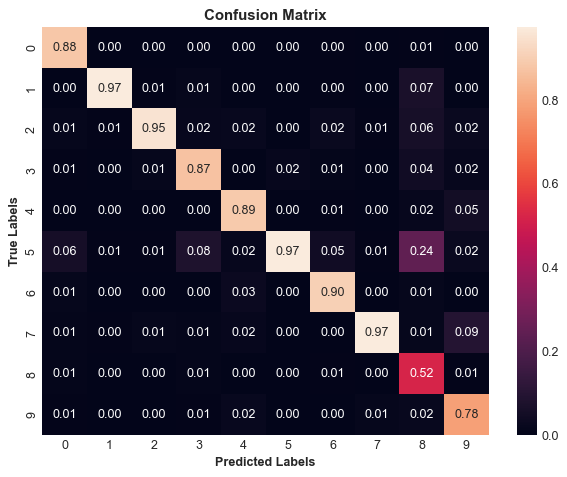

In [31]:
cm = confusion_matrix(y_test, y_pred)

# Calculate row sums
row_sums = cm.sum(axis=0)

# Divide each row by its sum (row normalization)
normalized_cm = cm / row_sums[np.newaxis, :]
plt.figure(figsize = (8, 6), dpi = 90)
sns.heatmap(normalized_cm, annot=True, fmt='.2f')
plt.xlabel('Predicted Labels',  fontdict = {'size':10, 'weight':'bold'})
plt.ylabel('True Labels',  fontdict = {'size':10, 'weight':'bold'})
plt.title('Confusion Matrix',  fontdict = {'size':12, 'weight':'bold'})
plt.show()

## Support Vector Machine (SVM) - Poly

In [32]:
svm_clf = svm.SVC(kernel = 'poly')
svm_clf.fit(X_train, y_train)

SVC(kernel='poly')

In [35]:
y_pred_svm = svm_clf.predict(X_test)

In [36]:
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))

Accuracy:  0.9745142857142857


In [37]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1670
           1       0.98      0.99      0.98      1995
           2       0.97      0.98      0.98      1760
           3       0.98      0.96      0.97      1748
           4       0.96      0.98      0.97      1706
           5       0.96      0.98      0.97      1571
           6       0.98      0.98      0.98      1745
           7       0.97      0.97      0.97      1836
           8       0.97      0.97      0.97      1730
           9       0.97      0.96      0.96      1739

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



In [40]:
classification_rep = classification_report(y_test, y_pred_svm, output_dict=True)

# Extract relevant data from the classification report
data = []

for key, value in classification_rep.items():
    if key not in ['accuracy', 'macro avg', 'weighted avg']:
        row = [key] + [value[label] for label in value.keys()]
        data.append(row)
# Create DataFrame from the extracted data
columns = ['class', 'precision', 'recall', 'f1-score', 'support']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df

,class,precision,recall,f1-score,support
0,0,0.983264,0.985030,0.984146,1670
1,1,0.981555,0.986967,0.984254,1995
2,2,0.971251,0.978977,0.975099,1760
3,3,0.981352,0.963387,0.972286,1748
4,4,0.964265,0.980657,0.972392,1706
5,5,0.957090,0.979631,0.968229,1571
6,6,0.984988,0.977650,0.981306,1745
7,7,0.974275,0.969499,0.971881,1836
8,8,0.974359,0.966474,0.970400,1730
9,9,0.970811,0.956297,0.963499,1739


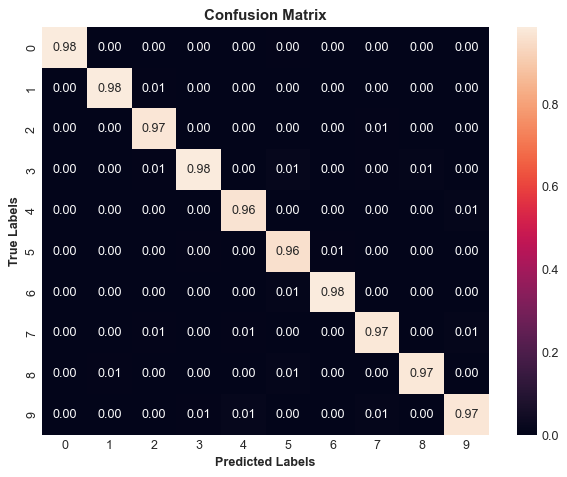

In [41]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Calculate row sums
row_sums = cm.sum(axis=0)

# Divide each row by its sum (row normalization)
normalized_cm = cm / row_sums[np.newaxis, :]
plt.figure(figsize = (8, 6), dpi = 90)
sns.heatmap(normalized_cm, annot=True, fmt='.2f')
plt.xlabel('Predicted Labels',  fontdict = {'size':10, 'weight':'bold'})
plt.ylabel('True Labels',  fontdict = {'size':10, 'weight':'bold'})
plt.title('Confusion Matrix',  fontdict = {'size':12, 'weight':'bold'})
plt.show()